# Итоговое задание ML-2

## Итерация №1

### Исследование данных

In [67]:
#Подключим необходимые библиотеки для нас

#Для матричных вычислений
import numpy as np
#Для анализа и предобработки данных
import pandas as pd
#Для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

#Линейные модели
from sklearn import linear_model
#Метрики
from sklearn import metrics
#Предобработка 
from sklearn import preprocessing
#Разделение выборки
from sklearn.model_selection import train_test_split

In [68]:
#Прочитаем наши данные
data = pd.read_csv('data/insurance.csv')
display(data.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
#Размер таблицы
print(data.shape)

(1338, 7)


In [70]:
#Выведем информацию о таблице и информацию о пропусках
display(data.info())
display(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [71]:
#Создаем копию данных
temp_data = data.copy()

In [72]:
#Вычисляем имена числовых признаков
types = temp_data.dtypes
features = list(types [(types != 'object')].index)
display(features)

['age', 'bmi', 'children', 'charges']

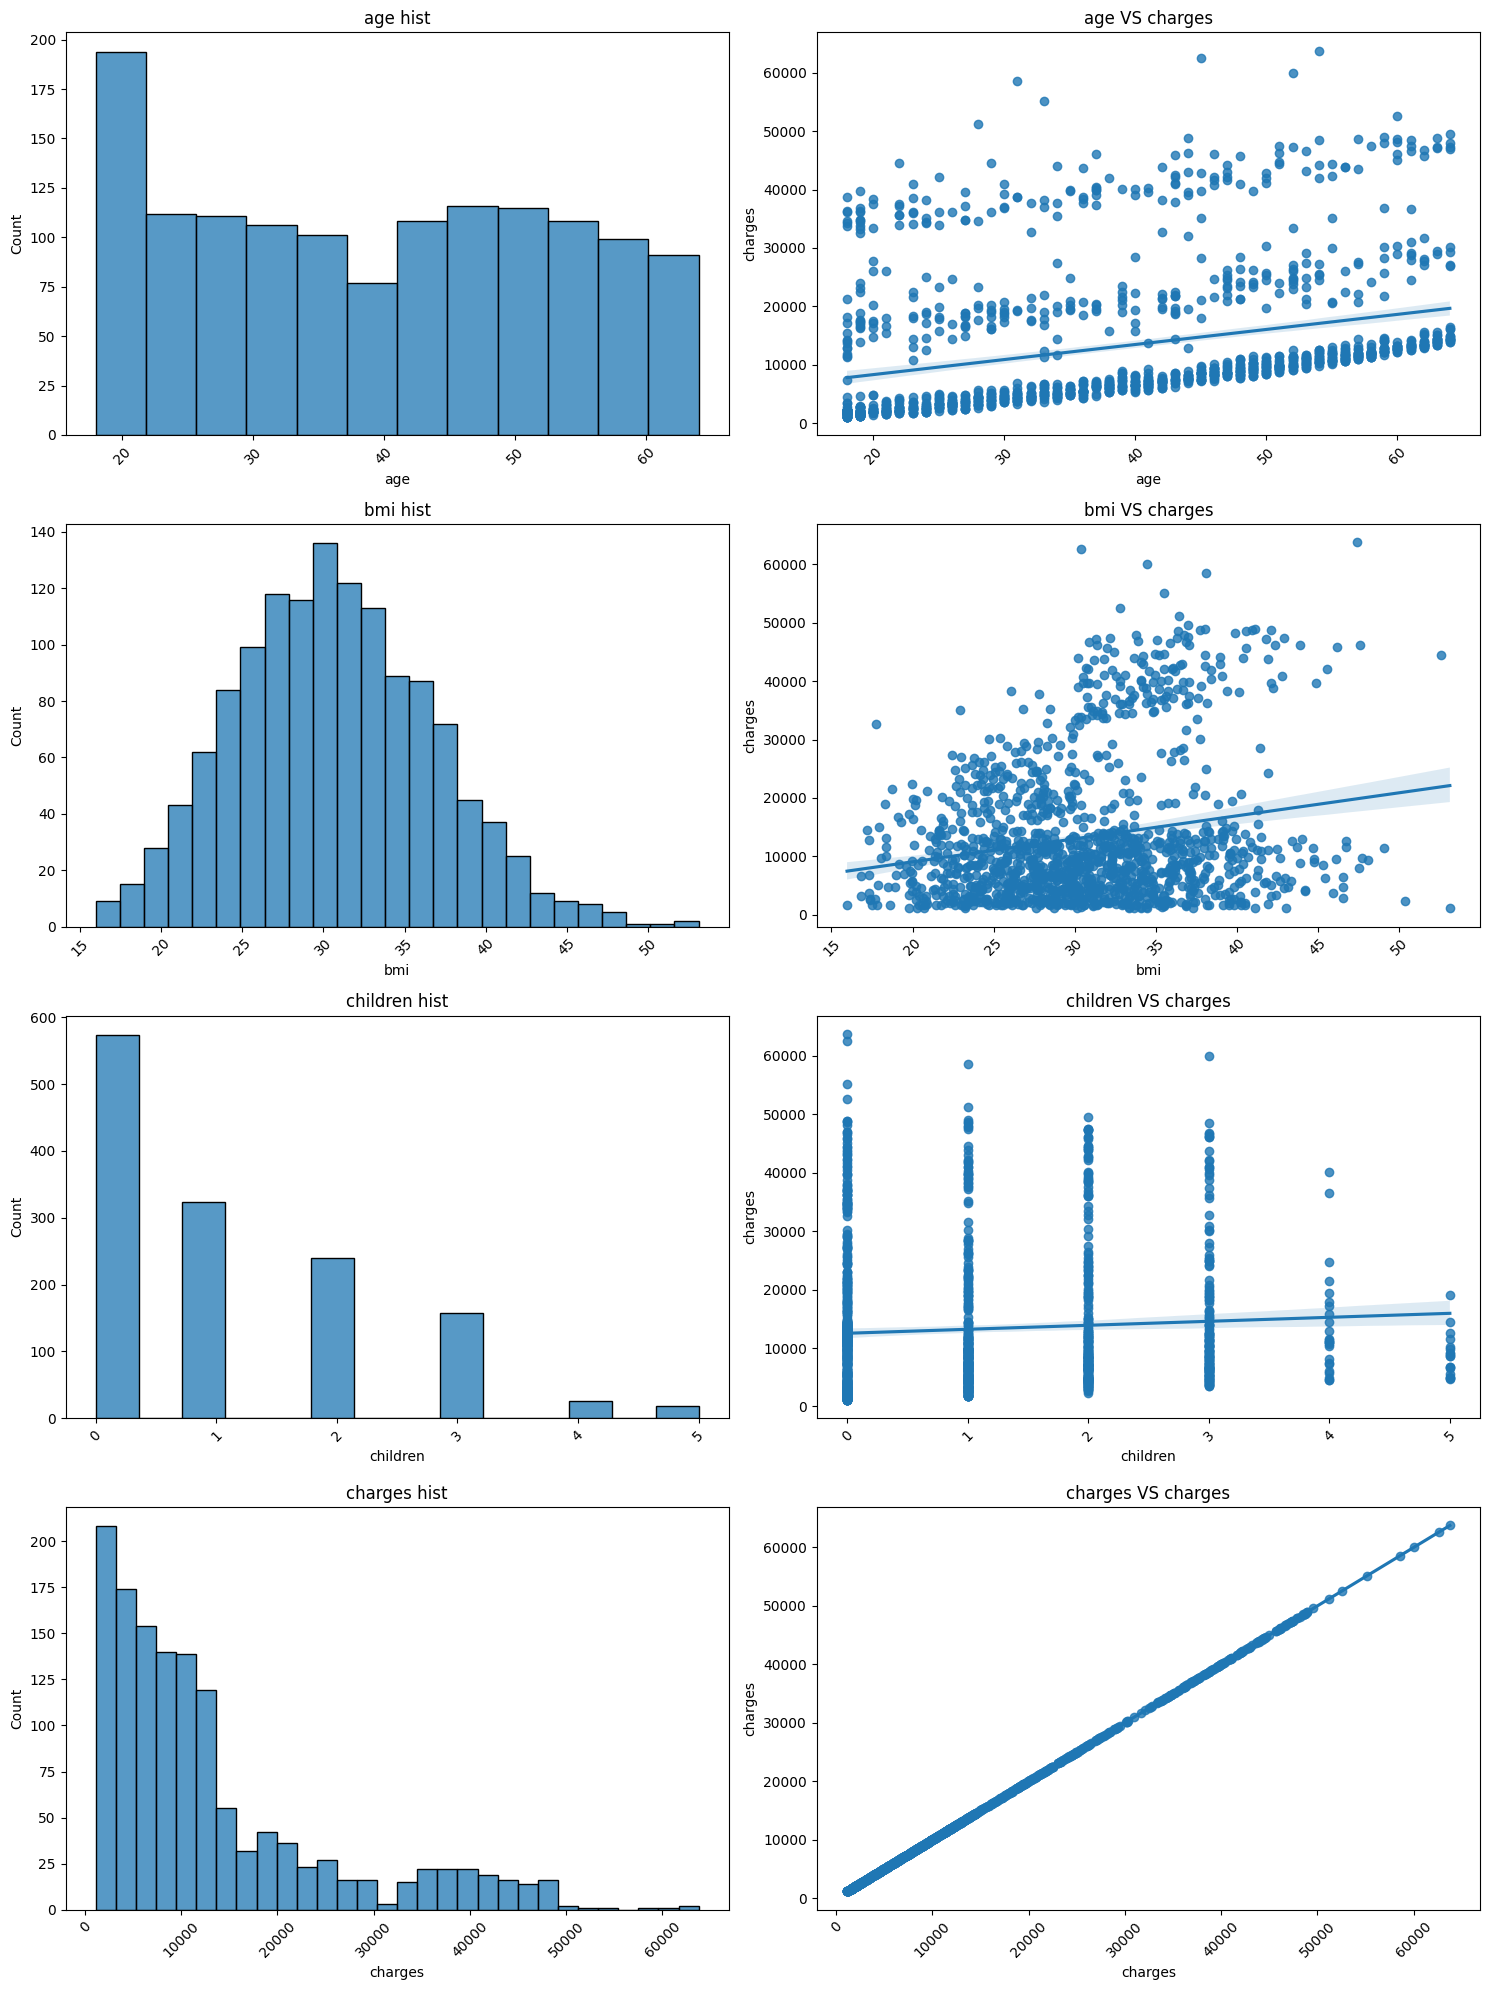

In [73]:
#Построим графики для каждого признака

#Количество числовых признаков
n = len(features)
#Фигура + n x 2 координатных плоскостей
fig, axes = plt.subplots(n, 2, figsize=(15, 20))

#Создаем цикл для всех признаков из списка числовых признаков
#i - индекс, feature - название признака в таблице
for i, feature in enumerate(features):
    #Строим гистограмму распределения призанка
    histplot = sns.histplot(data=temp_data, x = feature, ax=axes[i][0])
    #Добавляем подпись к графику 
    histplot.set_title('{} hist'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    #Строим диаграмму рассеяния + линейную регрессию
    regplot = sns.regplot(data=temp_data, x=feature, y='charges', ax=axes[i][1])
    #Добавляем подпись к графику
    regplot.set_title('{} VS charges'.format(feature));
    #Добавляем поворот отметок на оси абсцисс
    regplot.xaxis.set_tick_params(rotation=45)
#Выравнивание графиков
plt.tight_layout()
    

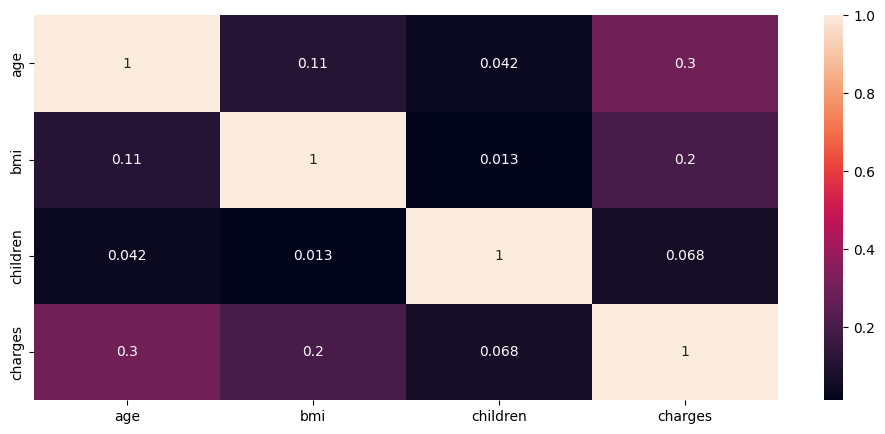

In [74]:
#Строим тепловую карту
fig = plt.figure(figsize=(12, 5))
sns.heatmap(temp_data[features].corr(), annot=True);

### Подготовка данных

In [75]:
#Кодируем признаки

#Кодирование бинарных категориальных признаклв
temp_data['smoker'] = temp_data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
temp_data['sex'] = temp_data['sex'].apply(lambda x: 0 if x == 'female' else 1)

#Оставшиеся категориальные признаки кодируем с помощью OneHot-кодирования
temp_data = pd.get_dummies(temp_data)
display(temp_data.head())

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [76]:
#Выделим факторы и целевой признак
features = temp_data.drop('charges', axis=1).columns

X = temp_data[features]
y = temp_data['charges']

### Задание 6.1

In [77]:
#Создаем тренировочную и тестовую выборки с помощью train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

#Выводим размеры полученных выборок
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1070, 9)
Test shape: (268, 9)


### Моделирование + оценка модели 

### Задание 6.2

In [78]:
#Обучить модель линейной регрессии аналитическим методом.
#Определить, чему рамен свободный член (intercept)

#Обучение модели линейной регрессии
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)

#Вывод intercept
print('INTERCEPT: {:.2f}'.format(lr_model.intercept_))


INTERCEPT: -12390.80


### Задание 6.3

In [79]:
#Сделать предсказание и рассчитать метрики полученной модели: R2, MAE, MAPE

#Функция заготовка метрик
def print_metrics (y_train, y_train_predict, y_test, y_test_predict):
    print('Train R2 score: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE score: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Train R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Train MAE score: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))
    
#Предсказание 
y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

#Вывод результирующих метрик
print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R2 score: 0.742
Train MAE score: 4208
Train MAPE: 42 %


Train R2 score: 0.784
Train MAE score: 4181
Train MAPE: 47 %


### Задание 6.4

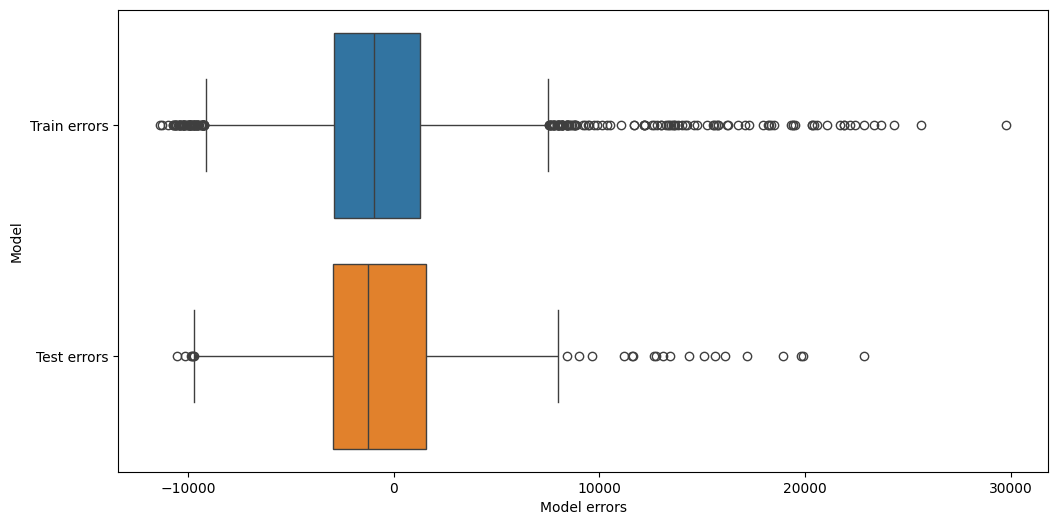

In [87]:
#Визуализация ошибок

#Фигура + координатная плоскость
fig, ax = plt.subplots(figsize=(12, 6))
#Ошибки модели на тренировочной выборке
y_train_errors = y_train - y_train_predict
#Ошибки модели на тестовой выборке
y_test_errors = y_test - y_test_predict

#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors,
     'Test errors': y_test_errors}
)
#Строим boxplot для ошибок
sns.boxplot(data=predict_df, orient='h', ax=ax)
#Название оси абсцисс
ax.set_xlabel('Model errors')
#Название оси ординат
ax.set_ylabel('Model');

### Итерация №2

### Моделирование

### Задание 6.5

In [81]:
#Нормализовать тренировочную и тестовую выборки с помощью MinMaxScaler
#На нормализованных данных сгенерировать полиномиальные признаки степени 2.as_integer_ratio

#Создаем объект MinMax нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры нормализации
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Создадим объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признаков
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

Train shape: (1070, 54)
Test shape: (268, 54)


### Задание 6.6

In [82]:
#Обучить модель линейной регрессии на полиномиальных признаках

#Обучение модели
lr_model_poly = linear_model.LinearRegression()
lr_model_poly.fit(X_train_scaled_poly, y_train)

#Предсказание
y_train_predict_poly = lr_model_poly.predict(X_train_scaled_poly)
y_test_predict_poly = lr_model_poly.predict(X_test_scaled_poly)

#Вывод результирующих метрик
print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)



Train R2 score: 0.842
Train MAE score: 2892
Train MAPE: 29 %


Train R2 score: 0.867
Train MAE score: 2730
Train MAPE: 30 %


### Задание 6.7

In [83]:
#Вывести значение коэффициентов модели и оценить их
print('Coefficients: {}'.format(lr_model_poly.coef_))

Coefficients: [ 2849.35067435  -417.24034999  5935.92169643  4636.08544526
  1139.1491985    351.86496094  -366.48563336   227.08922666
  -212.46855424  8399.63608632   812.46558472   995.68651894
 -1666.91118191   172.50303109  -848.02252419   280.84325571
  1455.92298005  1960.60696278  -417.24034999   647.47475622
 -1238.19812114   257.33745404  -966.67881613   311.8232212
   544.21466602  -306.59942109 -9711.00034091  1559.87212018
 54839.212545    3782.01457236  2765.86075737  -794.72610916
   182.77247586 -2090.61756751 -2233.48411893  2438.06291171
  2463.6574199    410.25306251  -675.88794885  1139.1491985
   318.56157022  -298.80831333  -589.98196067  1709.37790228
   351.86496094     0.             0.             0.
  -366.48563336     0.             0.           227.08922666
     0.          -212.46855424]


### Задание 6.8

In [84]:
#Построить линейную регрессию с l1-регуляризацией (Lasso)
lasso_lr_poly = linear_model.Lasso(max_iter=2000)

#Обучаем модель 
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание тренировочной выборки
y_train_lasso = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание тестовой выборки
y_test_lasso = lasso_lr_poly.predict(X_test_scaled_poly)

#Вывод результирующих метрик
print_metrics(y_train, y_train_lasso, y_test, y_test_lasso)

Train R2 score: 0.842
Train MAE score: 2890
Train MAPE: 29 %


Train R2 score: 0.867
Train MAE score: 2719
Train MAPE: 30 %


### Задание 6.9

In [85]:
#Построить линейную регрессию с l2-регуляризацией (Ridge)
lasso_lr_poly = linear_model.Ridge()

#Обучаем модель 
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание тренировочной выборки
y_train_lasso = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание тестовой выборки
y_test_lasso = lasso_lr_poly.predict(X_test_scaled_poly)

#Вывод результирующих метрик
print_metrics(y_train, y_train_lasso, y_test, y_test_lasso)

Train R2 score: 0.839
Train MAE score: 2949
Train MAPE: 30 %


Train R2 score: 0.863
Train MAE score: 2861
Train MAPE: 31 %
